In [1]:
# importar paquetes a ocupar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# importar archivos csv
crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)
crossBattlelog.info()

C:\Users\alniquia\AppData\Local\Temp\ipykernel_9964\3354061991.py:2: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  crossBattlelog = pd.read_csv('datasets/teams/battlelog_teams.csv', index_col=0)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 44994 entries, 0 to 44993
Data columns (total 57 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   battleTime                             44994 non-null  object 
 1   playertag                              44994 non-null  object 
 2   event.id                               44994 non-null  int64  
 3   event.mode                             41959 non-null  object 
 4   event.map                              44690 non-null  object 
 5   battle.mode                            44994 non-null  object 
 6   battle.type                            44994 non-null  object 
 7   battle.result                          44994 non-null  object 
 8   battle.duration                        44994 non-null  float64
 9   battle.trophyChange                    29955 non-null  float64
 10  battle.starPlayer.tag                  37881 non-null  object 
 11  ba

In [3]:
# importar archivos csv
players = pd.read_csv('datasets/players/players.csv', index_col=0)
players.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8948 entries, 0 to 8947
Data columns (total 17 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   tag                                   8948 non-null   object 
 1   name                                  8948 non-null   object 
 2   nameColor                             8700 non-null   object 
 3   trophies                              8948 non-null   int64  
 4   highestTrophies                       8948 non-null   int64  
 5   highestPowerPlayPoints                6734 non-null   float64
 6   expLevel                              8948 non-null   int64  
 7   expPoints                             8948 non-null   int64  
 8   isQualifiedFromChampionshipChallenge  8948 non-null   bool   
 9   3vs3Victories                         8948 non-null   int64  
 10  soloVictories                         8948 non-null   int64  
 11  duoVictories     

In [4]:
# crear columna playerteam
for i in range(len(crossBattlelog)):
	if any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team1.player1.tag'], crossBattlelog.loc[i, 'battle.team1.player2.tag'], crossBattlelog.loc[i, 'battle.team1.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team1'
	elif any(crossBattlelog.loc[i, 'playertag'] == tag for tag in [crossBattlelog.loc[i, 'battle.team2.player1.tag'], crossBattlelog.loc[i, 'battle.team2.player2.tag'], crossBattlelog.loc[i, 'battle.team2.player3.tag']]):
		crossBattlelog.loc[i, 'player_team'] = 'team2'
	else:
		print("error in team assignation for id " + str(i))

crossBattlelog['player_team'].value_counts()

team1    22529
team2    22465
Name: player_team, dtype: int64

In [5]:
# crear columna winner_team
for i in range(len(crossBattlelog)):
	if crossBattlelog.loc[i, 'battle.result'] == 'draw':
		crossBattlelog.loc[i, 'winner_team'] = 'draw'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	elif crossBattlelog.loc[i, 'player_team'] == 'team1' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'victory':
		crossBattlelog.loc[i, 'winner_team'] = 'team2'
	elif crossBattlelog.loc[i, 'player_team'] == 'team2' and crossBattlelog.loc[i, 'battle.result'] == 'defeat':
		crossBattlelog.loc[i, 'winner_team'] = 'team1'
	else:
		print("error in winner assignation for id " + str(i))

crossBattlelog['winner_team'].value_counts()

team1    22556
team2    22235
draw       203
Name: winner_team, dtype: int64

In [6]:
# agregar columna identificando batallas levelup y definir subset
for i in range(len(crossBattlelog)):

	t1p1 = crossBattlelog.loc[i, 'battle.team1.player1.brawler.trophies']
	t1p2 = crossBattlelog.loc[i, 'battle.team1.player2.brawler.trophies']
	t1p3 = crossBattlelog.loc[i, 'battle.team1.player3.brawler.trophies']
	t2p1 = crossBattlelog.loc[i, 'battle.team2.player1.brawler.trophies']
	t2p2 = crossBattlelog.loc[i, 'battle.team2.player2.brawler.trophies']
	t2p3 = crossBattlelog.loc[i, 'battle.team2.player3.brawler.trophies']

	if  (t1p1 <= 500 or t1p2 <= 500 or t1p3 <= 500 or t2p1 <= 500 or t2p2 <= 500 or t2p3 <= 500):
		crossBattlelog.loc[i, 'low_trophy'] = 'y'
	else:
		crossBattlelog.loc[i, 'low_trophy'] = 'n'

crossBattlelog = crossBattlelog[crossBattlelog['low_trophy'] == 'n']

crossBattlelog.shape

(28576, 60)

In [7]:
# unificar bases de brawlers
bk1 = crossBattlelog.rename(columns={'battle.team1.player1.brawler.name': 'brawlername'})
bk2 = crossBattlelog.rename(columns={'battle.team1.player2.brawler.name': 'brawlername'})
bk3 = crossBattlelog.rename(columns={'battle.team1.player3.brawler.name': 'brawlername'})
bk4 = crossBattlelog.rename(columns={'battle.team2.player1.brawler.name': 'brawlername'})
bk5 = crossBattlelog.rename(columns={'battle.team2.player2.brawler.name': 'brawlername'})
bk6 = crossBattlelog.rename(columns={'battle.team2.player3.brawler.name': 'brawlername'})

brawler = pd.concat([
bk1[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk2[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk3[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk4[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk5[['playertag','event.mode','event.map','player_team','brawlername','winner_team']], 
bk6[['playertag','event.mode','event.map','player_team','brawlername','winner_team']]
], ignore_index=True)

In [8]:
brawler.head()

,playertag,event.mode,event.map,player_team,brawlername,winner_team
0,#YGU20CRG,brawlBall,Sneaky Fields,team1,JACKY,team1
1,#YGU20CRG,brawlBall,Sneaky Fields,team1,JACKY,team1
2,#YGU20CRG,brawlBall,Sneaky Fields,team2,MAX,team2
3,#YGU20CRG,brawlBall,Sneaky Fields,team2,JACKY,team2
4,#YGU20CRG,brawlBall,Sneaky Fields,team2,ASH,team2


In [9]:
# crear pivot tables
pivot_bs = brawler.pivot_table(index=['brawlername','player_team','event.mode','event.map'], columns='winner_team', values='playertag', aggfunc='count', fill_value=0)

In [10]:
# reset indexes
pivot_bs.reset_index(drop=False, inplace=True)

In [11]:
# agregar columna totales, win y draw
def add_total(df):

	df['total_games'] = df['draw'] + df['team1'] + df['team2']

	for i in range(len(df)):
		df.loc[i, 'total_draws'] = df.loc[i, 'draw']
		if df.loc[i, 'player_team'] == 'team1':
			df.loc[i, 'total_wins'] = df.loc[i, 'team1']
		elif df.loc[i, 'player_team'] == 'team2':
			df.loc[i, 'total_wins'] = df.loc[i, 'team2']
		else:
			print("error en el procedimiento")

add_total(pivot_bs)

In [12]:
pivot_bs.head()

winner_team,brawlername,player_team,event.mode,event.map,draw,team1,team2,total_games,total_draws,total_wins
0,8-BIT,team1,bounty,Dry Season,0,2,0,2,0.0,2.0
1,8-BIT,team1,bounty,Hideout,0,3,1,4,0.0,3.0
2,8-BIT,team1,bounty,Layer Cake,0,1,0,1,0.0,1.0
3,8-BIT,team1,bounty,Shooting Star,0,2,0,2,0.0,2.0
4,8-BIT,team1,brawlBall,Backyard Bowl,1,21,6,28,1.0,21.0


In [13]:
# agrupar y calcular tasa de victoria
pivot_bs = pivot_bs[['brawlername','total_games','total_draws','total_wins','event.mode','event.map']].groupby(['brawlername','event.mode','event.map']).sum()
pivot_bs['winrate'] = pivot_bs['total_wins'] / pivot_bs['total_games']

pivot_bs.head()

winner_team                           total_games  total_draws  total_wins  \
brawlername event.mode event.map                                             
8-BIT       bounty     Dry Season               3          0.0         3.0   
                       Hideout                  5          0.0         4.0   
                       Layer Cake               2          0.0         2.0   
                       Shooting Star            5          0.0         5.0   
            brawlBall  Backyard Bowl           53          2.0        42.0   

winner_team                            winrate  
brawlername event.mode event.map                
8-BIT       bounty     Dry Season     1.000000  
                       Hideout        0.800000  
                       Layer Cake     1.000000  
                       Shooting Star  1.000000  
            brawlBall  Backyard Bowl  0.792453

In [14]:
# reset indexes and sort
pivot_bs = pivot_bs.sort_values(by=['brawlername','event.mode','event.map'], ascending=False)

pivot_bs.reset_index(drop=False, inplace=True)

In [15]:
gemGrabMM = pivot_bs[(pivot_bs['event.mode']=='gemGrab') & (pivot_bs['event.map'] == 'Minecart Madness')].sort_values(by='total_games', ascending=False)

In [16]:
# función que crea distribución por gamemode
def dist_gamemode(gamemode):
	df = pivot_bs[(pivot_bs['event.mode']==gamemode)].sort_values(by=['brawlername','event.map'], ascending=False)
	return df

#función que crea distribución por brawler
def dist_brawler(brawler):
	df = pivot_bs[(pivot_bs['brawlername']==brawler)].sort_values(by=['event.mode','event.map'], ascending=False)
	return df

#función que crea distribución por gamemode y map
def dist_gamemode_map(gamemode, map):
	df = pivot_bs[(pivot_bs['event.mode']==gamemode) & (pivot_bs['event.map']==map)].sort_values(by=['brawlername','event.map'], ascending=False)
	return df

In [17]:
# definir estilo de plot
print(plt.style.available)
plt.style.use('Solarize_Light2')
sns.set_theme('notebook')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


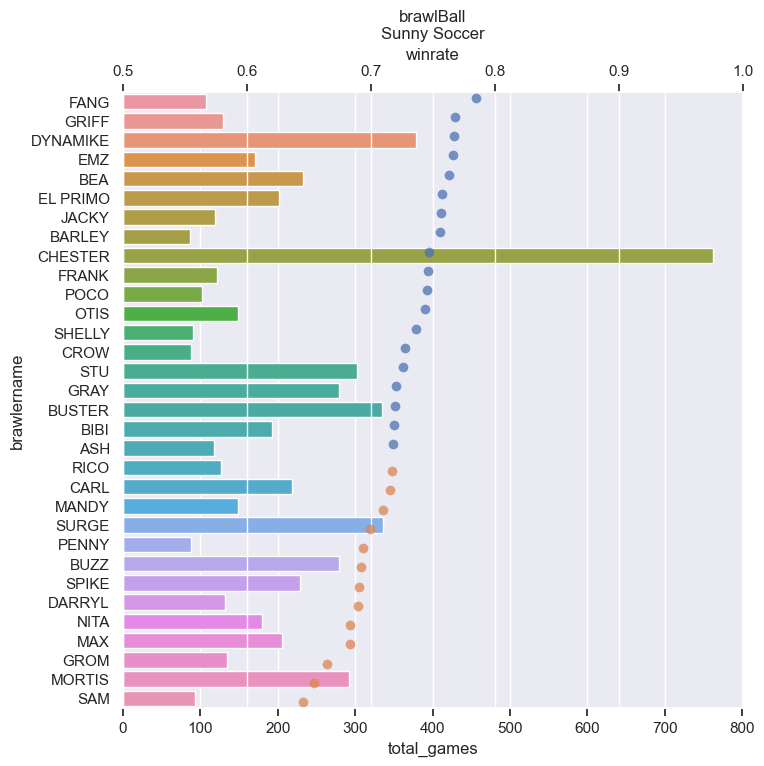

In [21]:
# gráfico gemgrab en minecraft madness
plt.figure(figsize=(8, 8))

gamemode_map = dist_gamemode_map('brawlBall', 'Sunny Soccer')

brawler_winrate = gamemode_map[['brawlername','total_games','total_wins']].groupby('brawlername').agg(sum)
brawler_winrate['winrate'] = brawler_winrate['total_wins'] / brawler_winrate['total_games']
brawler_winrate['percentile'] = brawler_winrate['total_games'] / brawler_winrate['total_games'].quantile(0.5)
brawler_winrate['percentile_wr'] = brawler_winrate['winrate'] / brawler_winrate['winrate'].quantile(0.5)
brawler_winrate['winrate_flag'] = np.where(brawler_winrate['percentile_wr'] > 1,'blue','red')

gamemodemapGraph = gamemode_map.merge(brawler_winrate[brawler_winrate['percentile'] >= 1], on="brawlername", suffixes=['','_brawler']).sort_values(by='winrate_brawler', ascending=False)

ay = plt.axes()

sns.barplot(
    data=gamemodemapGraph,
    x="total_games", y="brawlername"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0.5, 1))

sns.stripplot(
    data=gamemodemapGraph,
    x="winrate", y="brawlername", hue="winrate_flag", dodge=True, alpha=.75, zorder=1, size=7, legend=False
)

plt.title(gamemodemapGraph['event.mode'][0] + '\n' + gamemodemapGraph['event.map'][0])

plt.show()

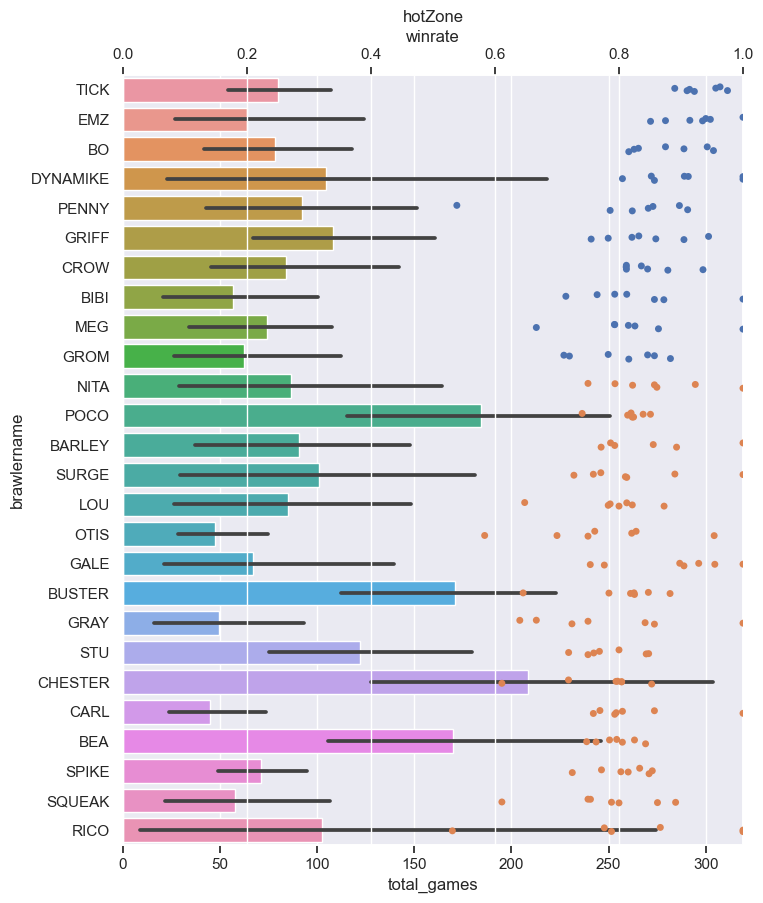

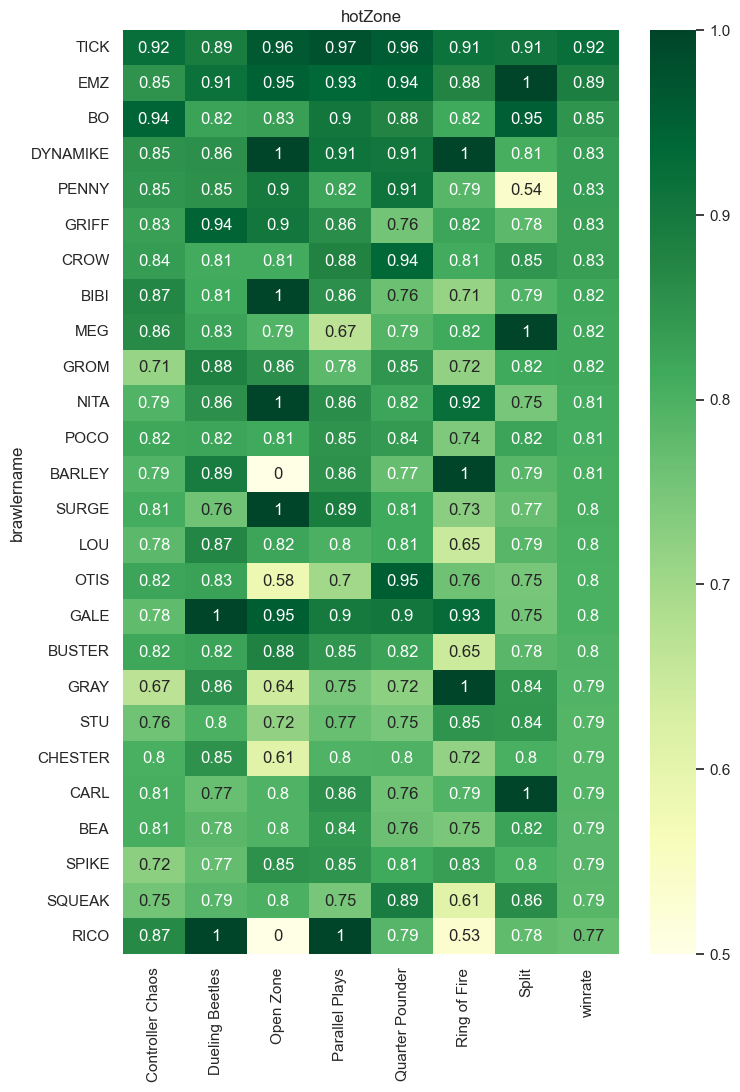

In [22]:
# gráfico gamemode
plt.figure(figsize=(8, 10))

gamemode = dist_gamemode('hotZone')

brawler_winrate = gamemode[['brawlername','total_games','total_wins']].groupby('brawlername').agg(sum)
brawler_winrate['winrate'] = brawler_winrate['total_wins'] / brawler_winrate['total_games']
brawler_winrate['percentile'] = brawler_winrate['total_games'] / brawler_winrate['total_games'].quantile(0.6)
brawler_winrate['percentile_wr'] = brawler_winrate['winrate'] / brawler_winrate['winrate'].quantile(0.5)
brawler_winrate['winrate_flag'] = np.where(brawler_winrate['percentile_wr'] > 1,'blue','red')

#maplist = gamemode['event.map'].drop_duplicates()

gamemodeGraph = gamemode.merge(brawler_winrate[brawler_winrate['percentile'] >= 1], on="brawlername", suffixes=['','_brawler']).sort_values(by='winrate_brawler', ascending=False)

ay = plt.axes()

sns.barplot(
    data=gamemodeGraph
    ,x="total_games"
    ,y="brawlername"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0, 1))

sns.stripplot(
    data=gamemodeGraph,
    x="winrate", y="brawlername", hue="winrate_flag", legend=False
)

plt.title(gamemodeGraph['event.mode'][0])

plt.show()

plt.figure(figsize=(8, 12))

hmGraph = gamemodeGraph.pivot_table(index="brawlername", columns="event.map", values="winrate", fill_value=0).merge(brawler_winrate['winrate'], on="brawlername", how='inner').sort_values(by='winrate', ascending=False)

sns.heatmap(
    data=hmGraph
    ,annot=True
    ,cmap="YlGn"
    ,vmin=0.5
)

plt.title(gamemodeGraph['event.mode'][0])

plt.show()

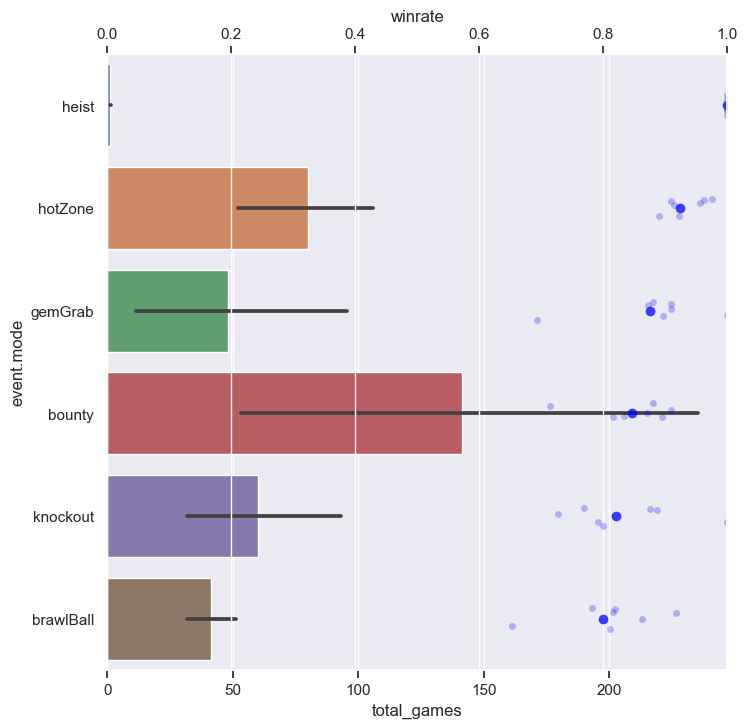

In [24]:
# gráfico brawler
plt.figure(figsize=(8, 8))

brawler = dist_brawler('TICK')

gamemode_winrate = brawler[['event.mode','total_games','total_wins']].groupby('event.mode').agg(sum)
gamemode_winrate['winrate'] = gamemode_winrate['total_wins'] / gamemode_winrate['total_games']

#maplist = brawler['event.map'].drop_duplicates()

brawlerGraph = brawler.merge(gamemode_winrate, on="event.mode", suffixes=['','_gamemode']).sort_values(by='winrate_gamemode', ascending=False)

#colorlist = sns.color_palette("Set2")

ay = plt.axes()

sns.barplot(
    data=brawlerGraph,
    x="total_games", y="event.mode"
)

twin_axes = ay.twiny()

twin_axes.set(xlim=(0, 1))

sns.stripplot(
    data=brawlerGraph,
    x="winrate", y="event.mode", color='blue', dodge=True, alpha=.25, zorder=1
)

sns.stripplot(
    data=gamemode_winrate,
    x="winrate", y="event.mode", color='blue', alpha=.75, zorder=1, size=7
)

plt.show()